# Gradient Descent Intro
 <p>

In [2]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [3]:
def lin(a,b,x): return a*x+b

In [4]:
a=3.
b=8.

In [5]:
n=30
x = random(n)
y = lin(a,b,x)

In [6]:
x

array([0.2219, 0.9452, 0.7905, 0.8354, 0.2957, 0.7374, 0.4011, 0.409 , 0.4484, 0.7789, 0.6858,
       0.0189, 0.6685, 0.2531, 0.1634, 0.5572, 0.691 , 0.8844, 0.49  , 0.8884, 0.1952, 0.7314,
       0.7318, 0.7756, 0.7285, 0.8209, 0.0818, 0.3438, 0.8743, 0.2214])

In [7]:
y

array([ 8.6657, 10.8357, 10.3716, 10.5061,  8.887 , 10.2121,  9.2034,  9.2271,  9.3453, 10.3368,
       10.0574,  8.0566, 10.0054,  8.7593,  8.4901,  9.6715, 10.0731, 10.6532,  9.4701, 10.6652,
        8.5856, 10.1941, 10.1953, 10.3269, 10.1856, 10.4626,  8.2454,  9.0313, 10.623 ,  8.6641])

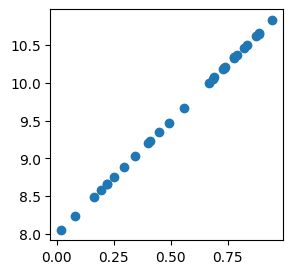

In [8]:
plt.scatter(x,y)

In [9]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [10]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.2868

In [11]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [12]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [13]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani